In [1]:
#from pyaedt.hfss import Hfss
from ansys.aedt.core import Hfss
import os, copy, pprint, math
import numpy as np
import matplotlib.pyplot as plt

c:\Users\ymino\.conda\envs\pyaedtt\Lib\site-packages\ansys\aedt\core\modeler\schematic.py:40: UserWarning: EMIT API is only available for Python 3.8-3.12.
  warnings.warn("EMIT API is only available for Python 3.8-3.12.")


## Configuration

In [2]:

solution_type = "Eigenmode" # "Eigenmode", "Modal"

# Common options
use_antenna = False
use_second_chip = False

# Eigen mode
n_mode = 14
copy_mesh = True
max_passes  = 20

# Driven modal mode
adaptive_solution_type = "single" # single, broadband
start_frequency = 10.0
stop_frequency  = 20.0
medium_frequency = 0.5*(start_frequency + stop_frequency)
adaptive_setup_frequency = medium_frequency
num_of_freq_points = 201
n_waveport_mode = 2

max_delta_s = 0.02

# Sweep flags
do_chip_inductance_sweep  = True
do_chip_angle_sweep       = False
do_chip_gap_sweep         = False
do_chip_width_sweep       = False
do_chip_height_sweep      = False
do_chip_pos_z_ratio_sweep = False
do_outer_radius_sweep     = False
do_outer_height_sweep     = False
do_coax_height_sweep      = False

no_variation = \
    do_chip_inductance_sweep or\
    do_chip_angle_sweep or\
    do_chip_gap_sweep or\
    do_chip_width_sweep or\
    do_chip_height_sweep or\
    do_chip_pos_z_ratio_sweep or\
    do_outer_radius_sweep or\
    do_outer_height_sweep or\
    do_coax_height_sweep

In [3]:
sweep_list = {
    "$chip_inductance" : [
        dict(start_point = 1.25, end_point = 3, step = 0.25, units = "nH", variation_type="LinearStep"),
        dict(start_point = 0.4, end_point = 1, step = 0.05, units = "nH", variation_type="LinearStep"),
    ]
}

## Make project and design

In [4]:
hfss = Hfss(
    project       = "test.aedt",
    design        = "A1",
    solution_type = solution_type
)
hfss.logger.logger.setLevel("WARNING")
hfss.modeler.logger.logger.setLevel("WARNING")

PyAEDT INFO: Python version 3.13.5 | packaged by conda-forge | (main, Jun 16 2025, 08:20:19) [MSC v.1943 64 bit (AMD64)].
PyAEDT INFO: PyAEDT version 0.18.1.
PyAEDT INFO: Initializing new Desktop session.
PyAEDT INFO: Log on console is enabled.
PyAEDT INFO: Log on file C:\Users\ymino\AppData\Local\Temp\15\pyaedt_ymino_ad898153-330e-48ff-a83e-a73a0a25a1cc.log is enabled.
PyAEDT INFO: Log on AEDT is disabled.
PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.
PyAEDT INFO: Launching PyAEDT with gRPC plugin.
PyAEDT ERROR: A(n) <class 'psutil.AccessDenied'> error occurred while retrieving information for the active AEDT sessions: (pid=11984, name='ansysedt.exe')
PyAEDT ERROR: A(n) <class 'psutil.AccessDenied'> error occurred while retrieving information for the active AEDT sessions: (pid=13016, name='ansysedt.exe')
PyAEDT ERROR: A(n) <class 'psutil.AccessDenied'> error occurred while retrieving information for the active AEDT sessions: (pid=16452, name='ansysedt.exe')

In [5]:
# Best configuration
# degree : 0, chip gap : 2000 um, chip width : 500 um, chip height : 800 um , pos_z_ratio : 0.7 (-7.5 dB between 12 - 20 GHz)
# degree : 0, chip gap : 500 um , chip width : 500 um, chip height : 1600 um, pos_z_ratio : 0.7 (-6.7 dB between 12 - 20 GHz)

# nominal : 12.6 GHz, L = 1.4 nH

# 8.6  GHz, L = 30   nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 10.4 GHz, L = 20   nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 11.7 GHz, L = 15   nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 12.1 GHz, L = 13.5 nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 12.6 GHz, L = 13   nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 12.8 GHz, L = 12.5 nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um
# 14.1 GHz, L = 10   nH, chip_gap = 2000 um, chip_width = 250 um, chip_height = 400 um

#  ? GHz, L = 30 nH, chip_gap = 8000 um, chip_width = 250 um, chip_height = 400 um

#  19 GHz, L = 9 nH, chip_gap = 20 um, chip_width = 250 um, chip_height = 4000 um

hfss["$outer_radius"]         = "8mm" # 5mm, 8mm (for 10GHz cut-off)
hfss["$outer_height"]         = "38mm" # 38mm
hfss["$coax_radius"]          = "1.5mm" # "1.5mm"
hfss["$coax_height"]          = "9mm"
hfss["$antenna_height"]       = "18mm"
hfss["antenna_radius"]        = "1.5mm"
hfss["$antenna_outer_height"] = "8mm"
hfss["antenna_outer_radius"]  = "3mm"
hfss["$chip_inductance"]      = "1.4nH"
hfss["$chip_gap"]             = "220um" # 20um
hfss["$chip_width"]           = "250um" # 250um
hfss["$chip_height"]          = "2000um" # 400um (For chip_gap = 20um, galvanic with 3240 ( ~4500 with 45 degree ? ) )
hfss["$chip_theta"]           = "0deg" # 0deg
hfss["$chip_pos_z_ratio"]     = "0.6"
hfss["$chip_pos_z"]           = "$chip_pos_z_ratio*$coax_height"
hfss["$chip_pos_y"]           = "$coax_radius + 0.5*($outer_radius - $coax_radius)"
hfss["$wafer_thickness"]      = "0.525mm"
hfss["$wafer_width"]          = "2mm"
hfss["$wafer_height"]         = "6mm"
hfss["box_height"]            = "40mm"
hfss["$box_length"]           = "2*$outer_radius + 10mm" #"15mm"

In [6]:
box_config = dict(
    origin   = ["-$box_length/2", "-$box_length/2", "$outer_height - box_height"],
    sizes    = ["$box_length", "$box_length", "box_height"],
    name     = "box",
    material = "copper"
)
if use_antenna:
    box_config.update( sizes = ["$box_length", "$box_length", "box_height + $antenna_outer_height"] )

box_object = hfss.modeler.create_box( **box_config )

## Make Vacuum object
#_, vacuum_name = hfss.modeler.duplicate_around_axis(box_object, "Z", angle = 0)
vacuum_object = box_object.clone()
vacuum_object.name = "boundary"
vacuum_object = hfss.modeler.get_object_from_name("boundary")
hfss.assign_material("boundary", "vacuum")
if solution_type == "Eigenmode":
    # hfss.modeler.move_face([vacuum_object.top_face_z], offset=20) # offset in mm
    hfss.assign_finite_conductivity([vacuum_object.top_face_z],is_infinite_ground=True)

In [7]:
cylinder_config = dict(
    orientation = "Z",
    origin      = [0, 0, 0],
    radius      = "$outer_radius",
    height      = "$outer_height",
    name        = "outer",
    material    = "vacuum"
)

cylinder_object = hfss.modeler.create_cylinder( **cylinder_config )

In [8]:
box_object.subtract(cylinder_object, keep_originals=False)

In [9]:
cylinder_config = dict(
    orientation = "Z",
    origin      = [0, 0, 0],
    radius      = "$coax_radius",
    height      = "$coax_height",
    name        = "coax",
    material    = "copper"
)

coax_object = hfss.modeler.create_cylinder( **cylinder_config )

In [10]:
box_object.unite(coax_object)

## Create antenna

In [11]:
if use_antenna:
    antenna_config = dict(
        orientation = "Z",
        origin      = [0, 0, "$outer_height"],
        radius      = "antenna_outer_radius",
        height      = "$antenna_outer_height",
        name        = "antenna",
        material    = "vacuum"
    )

    antenna_object = hfss.modeler.create_cylinder( **antenna_config )
    box_object.subtract(antenna_object, keep_originals=False)

    antenna_config = dict(
        orientation = "Z",
        origin      = [0, 0, "$outer_height + $antenna_outer_height - $antenna_height"],
        radius      = "antenna_radius",
        height      = "$antenna_height",
        name        = "core",
        material    = "copper"
    )

    core_object = hfss.modeler.create_cylinder( **antenna_config )

## Create wafer

In [12]:
wafer_coord = hfss.modeler.create_coordinate_system(origin = [0, "$chip_pos_y","$chip_pos_z"], name = "wafer_coord")
wafer_coord.set_as_working_cs()
wafer_config = dict(
    origin   = ["-$wafer_width/2", "-$wafer_height/2", 0],
    sizes    = ["$wafer_width", "$wafer_height", "$wafer_thickness"],
    name     = "wafer",
    material = "silicon"
)
wafer_object = hfss.modeler.create_box( **wafer_config )

## Create chip

In [13]:
chip_coord = hfss.modeler.create_coordinate_system(origin = [0, 0,"$wafer_thickness"], reference_cs="wafer_coord", name = "chip_coord")
chip_coord.set_as_working_cs()
cap1 = hfss.modeler.create_rectangle(origin = ["-0.5*$chip_width", "0.5*$chip_gap", 0], sizes = ["$chip_width", "$chip_height"], name = "cap1", orientation="XY")
cap2 = hfss.modeler.create_rectangle(origin = ["-0.5*$chip_width", "-0.5*$chip_gap - $chip_height", 0], sizes =  ["$chip_width", "$chip_height"], name = "cap2", orientation="XY")

In [14]:
## Only for newer pyaedt versions ?
hfss.assign_perfect_e("box")
hfss.assign_perfect_e("cap1")
hfss.assign_perfect_e("cap2")
if use_antenna:
    hfss.assign_perfect_e("core")

## Create ports

In [15]:
# faces = vacuum_object.faces
# top_face = max(faces, key=lambda f: f.center[2])

In [16]:
hfss.modeler.set_working_coordinate_system("Global")
if solution_type=="Modal":
    if use_antenna:
        port_in = hfss.modeler.create_circle(origin = [0, 0, "$outer_height + $antenna_outer_height"], radius = "antenna_outer_radius", name = "port_in", orientation="XY")
        hfss.lumped_port(assignment="port_in", integration_line = hfss.AxisDir.YNeg, name="Port_in")
    else:
        port_in = hfss.modeler.create_circle(origin = [0, 0, "$outer_height"], radius = "$outer_radius", name = "port_in", orientation="XY")
        hfss.wave_port(assignment="port_in", name = "Port_in", modes = n_waveport_mode)

hfss.modeler.set_working_coordinate_system("chip_coord")
port_out = hfss.modeler.create_rectangle(origin = ["-10um","-0.5*$chip_gap" ], sizes=["20um","$chip_gap"], name = "port_out", orientation="XY")
if solution_type=="Eigenmode":
    sheet = hfss.assign_lumped_rlc_to_sheet(assignment="port_out", 
                                    start_direction=hfss.AxisDir.YNeg, 
                                    inductance=9e-9, name="Port_out")
    sheet.update_property(
        prop_name = "Inductance",
        prop_value = "$chip_inductance"
    )
else:
    # hfss.assign_lumped_rlc_to_sheet(assignment="port_out", start_direction=hfss.AxisDir.YNeg, inductance=chip_inductance, name="Port_out")
    hfss.lumped_port(assignment="port_out", integration_line = hfss.AxisDir.YNeg, name="Port_out")

## Rotate chip

In [17]:
# rotate_coord = hfss.modeler.create_coordinate_system(origin = [0, "-0.5*$chip_gap - $chip_height", 0], reference_cs="chip_coord", name = "rotate_coord")
# rotate_coord.set_as_working_cs()
hfss.modeler.set_working_coordinate_system("chip_coord")
hfss.modeler.rotate(assignment=["wafer","cap1","cap2","port_out"], axis="X", angle="$chip_theta")

True

In [18]:
if use_second_chip:
    hfss.modeler.set_working_coordinate_system("Global")
    duplicate_object = ["wafer","cap1","cap2","port_out"]
    _, object_name = hfss.modeler.duplicate_around_axis(duplicate_object, "Z", angle = 90)
    for i, obj_name in enumerate(duplicate_object):
        obj = hfss.modeler.get_object_from_name(object_name[i])
        obj.name = f"chip2_{obj_name}"
    # cap1_object = hfss.modeler.get_object_from_name(object_name[0])
    # cap1_object.name = "chip2_cap1"
    # cap2_object = hfss.modeler.get_object_from_name(object_name[1])
    # cap2_object.name = "chip2_cap2"
    # port_object = hfss.modeler.get_object_from_name(object_name[2])
    # port_object.name = "chip2_port_out"

## Assign mesh operation

In [19]:
hfss.mesh.assign_length_mesh(["cap1", "cap2"], inside_selection=False, maximum_length="20um", name="mesh_cap")
hfss.mesh.assign_length_mesh(["port_out"], inside_selection=False, maximum_length="5um", name="mesh_JJ") # maximum 7um for JJ in qiskit-metal
if use_second_chip:
    hfss.mesh.assign_length_mesh(["chip2_cap1","chip2_cap2"], inside_selection=False, maximum_length="20um", name="mesh_cap2")
    hfss.mesh.assign_length_mesh(["chip2_port_out"], inside_selection=False, maximum_length="5um", name="mesh_JJ")

## Create Analysis Setup

In [20]:
# if solution_type=="Modal":
#     hfss.create_open_region(Frequency="1GHz")

if solution_type=="Modal":

    setup = hfss.create_setup("MySetup")
    setup.create_frequency_sweep(
        unit="GHz",
        name="Sweep1",
        start_frequency=start_frequency,
        stop_frequency=stop_frequency,
        num_of_freq_points=num_of_freq_points,
        sweep_type="Interpolating",
    )
    if adaptive_solution_type == "broadband":
        setup.enable_adaptive_setup_broadband(
            low_frequency=start_frequency,
            high_frquency=stop_frequency,
            max_passes=max_passes,
            max_delta_s=max_delta_s
        ) 
    elif adaptive_solution_type == "single":
        setup.enable_adaptive_setup_single(
            freq=adaptive_setup_frequency,
            max_passes=max_passes,
            max_delta_s=max_delta_s
        )
        # setup.props["MaximumPasses"] = 20
        # setup.props["MaxDeltaS"] = 0.01
    pprint.pprint(setup.props)

In [21]:
if solution_type=="Eigenmode":
    setup = hfss.create_setup("MySetup") 
    # setup.props["MinimumFrequency"] = "2GHz" 
    setup.props["MinimumFrequency"] = "500MHz" 
    setup.props["NumModes"] = n_mode
    setup.props["MaximumPasses"] = max_passes
    print(setup.props)

{'MinimumFrequency': '500MHz', 'NumModes': 14, 'MaxDeltaFreq': 10, 'ConvergeOnRealFreq': False, 'MaximumPasses': 20, 'MinimumPasses': 1, 'MinimumConvergedPasses': 1, 'PercentRefinement': 30, 'IsEnabled': True, 'MeshLink': {'ImportMesh': False}, 'BasisOrder': 1, 'DoLambdaRefine': True, 'DoMaterialLambda': True, 'SetLambdaTarget': False, 'Target': 0.2, 'UseMaxTetIncrease': False, 'Name': 'MySetup'}


In [22]:
if do_chip_inductance_sweep:
    
    key = "$chip_inductance"
    sweep = None
    for i, config in enumerate( sweep_list[key] ):
        if not sweep:
            sweep_config = dict(
                variable       = key,
                start_point    = str(config["start_point"]) + config["units"],
                end_point      = str(config["end_point"]) + config["units"],
                variation_type = config["variation_type"],
                name           = "Sweep",
            )
            if config["variation_type"] == "LinearStep":
                sweep_config["step"] = str(config["step"]) + config["units"]
            elif config["variation_type"] == "LinearCount":
                sweep_config["step"] = config["step"]

            sweep = hfss.parametrics.add(**sweep_config)
        else:
            config["sweep_variable"] = key
            sweep.add_variation(**config)

    # Added for chip_gap = 20 um
    # sweep = hfss.parametrics.add(
    #     variable="$chip_inductance",
    #     start_point="1.25nH", 
    #     end_point="3nH",
    #     step="0.25nH",
    #     variation_type="LinearStep",
    #     name="ChipInductance"
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=0.4,
    #     end_point=1,
    #     step=0.05,
    #     units="nH",
    #     variation_type="LinearStep",
    # )

    # Added for chip_gap = 4000 um, chip_gap = 6000 um
    # sweep = hfss.parametrics.add(
    #     variable="$chip_inductance",
    #     start_point="60nH", # 5nH
    #     end_point="100nH", # 30nH
    #     step="10nH",
    #     variation_type="LinearStep",
    #     name="ChipInductance"
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=25,
    #     end_point=50,
    #     step=5,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=1,
    #     end_point=20,
    #     step=1,
    #     units="nH",
    #     variation_type="LinearStep",
    # )

    # Added for chip_gap = 2000 um
    # sweep = hfss.parametrics.add(
    #     variable="$chip_inductance",
    #     start_point="25nH", # 5nH
    #     end_point="50nH", # 30nH
    #     step="5nH",
    #     variation_type="LinearStep",
    #     name="ChipInductance"
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=11,
    #     end_point=20,
    #     step=1,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=5,
    #     end_point=10,
    #     step=0.5,
    #     units="nH",
    #     variation_type="LinearStep",
    # )

    # Added for chip_height = 4000 um
    # sweep = hfss.parametrics.add(
    #     variable="$chip_inductance",
    #     start_point="30nH", 
    #     end_point="100nH", 
    #     step="10nH",
    #     variation_type="LinearStep",
    #     name="ChipInductance"
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=12,
    #     end_point=20,
    #     step=2,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=6,
    #     end_point=10,
    #     step=1,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=1,
    #     end_point=5,
    #     step=0.5,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=0.1,
    #     end_point=0.9,
    #     step=0.1,
    #     units="nH",
    #     variation_type="LinearStep",
    # )
    # sweep.add_variation(
    #     sweep_variable="$chip_inductance",
    #     start_point=0.01,
    #     end_point=0.09,
    #     step=0.01,
    #     units="nH",
    #     variation_type="LinearStep",
    # )


In [23]:
if do_chip_angle_sweep:
    sweep = hfss.parametrics.add(
        variable="$chip_theta",
        # start_point="-90deg",
        # end_point="45deg",
        # step=4,
        start_point="0deg",
        end_point="0deg",
        step=1,
        name="Sweep"
    )
    # hfss.set_oo_property_value(
    #     aedt_object=hfss.ooptimetrics, 
    #     object_name="ChipAngle", 
    #     prop_name='SaveFields', 
    #     value='True')
    # sweep.analyze(cores = 8)

In [24]:
if do_chip_gap_sweep:
    # sweep = hfss.parametrics.add(
    #     variable="$chip_gap",
    #     start_point="300um",
    #     end_point="8300um",
    #     step=5,
    #     name="Sweep"
    # )
    sweep.add_variation(
        sweep_variable="$chip_gap",
        start_point=20,
        end_point=520,
        step=100,
        units="um",
        variation_type="LinearStep",
    )
    sweep.add_variation(
        sweep_variable="$chip_gap",
        start_point=1020,
        end_point=2020,
        step=500,
        units="um",
        variation_type="LinearStep",
    )
    # hfss.set_oo_property_value(
    #     aedt_object=hfss.ooptimetrics, 
    #     object_name="ChipGap", 
    #     prop_name='SaveFields', 
    #     value='True')
    # sweep.analyze(cores = 8)

In [25]:
if do_chip_width_sweep:
    # sweep = hfss.parametrics.add(
    #     variable="$chip_width",
    #     start_point="250um",
    #     end_point="2000um",
    #     step=5,
    #     name="Sweep"
    # )
    sweep.add_variation(
        sweep_variable="$chip_width",
        start_point=100,
        end_point=1000,
        step=150,
        variation_type="LinearStep",
    )
    sweep.add_variation(
        sweep_variable="$chip_width",
        start_point=1500,
        end_point=3000,
        step=500,
        variation_type="LinearStep",
    )

In [26]:
if do_chip_pos_z_ratio_sweep:
    # sweep = hfss.parametrics.add(
    #     variable="$chip_pos_z_ratio",
    #     start_point="0.5",
    #     end_point="1.5",
    #     step=0.2,
    #     variation_type="LinearStep",
    #     name="Sweep"
    # )
    sweep.add_variation(
        sweep_variable="$chip_pos_z_ratio",
        start_point=0.4,
        end_point=0.8,
        step=0.1,
        variation_type="LinearStep",
    )

In [27]:
if do_chip_height_sweep:
    # sweep = hfss.parametrics.add(
    #     variable="$chip_height",
    #     start_point="400um",
    #     end_point="4000um",
    #     step=5,
    #     name="ChipHeight"
    # )
    # hfss.set_oo_property_value(
    #     aedt_object=hfss.ooptimetrics, 
    #     object_name="ChipHeight", 
    #     prop_name='SaveFields', 
    #     value='True')
    # sweep.analyze(cores = 8)
    sweep.add_variation(
        sweep_variable="$chip_height",
        start_point=500,
        end_point=3000,
        step=500,
        units="um",
        variation_type="LinearStep",
    )

In [28]:
if do_outer_radius_sweep:
    radius_sweep = hfss.parametrics.add(
        variable="$outer_radius",
        start_point="5mm",
        end_point="15mm",
        step=6,
        name="Radius"
    )
    radius_sweep.analyze(cores = 8)

In [29]:
if do_outer_height_sweep:
    radius_sweep = hfss.parametrics.add(
        variable="$outer_height",
        start_point="18mm",
        end_point="38mm",
        step=11,
        name="OuterHeight"
    )
    hfss.set_oo_property_value(
        aedt_object=hfss.ooptimetrics, 
        object_name="OuterHeight", 
        prop_name='SaveFields', 
        value='True')
    radius_sweep.analyze(cores = 8)

In [30]:
if do_coax_height_sweep:
    height_sweep = hfss.parametrics.add(
        variable="$coax_height",
        start_point="9mm",
        end_point="38mm",
        step=3,
        name="Coax_height"
    )
    height_sweep.analyze(cores = 8)

## Analyze

In [ ]:
if not no_variation:
    hfss.analyze_setup(name = "MySetup", cores=8)
else:
    ## You can check the available properties
    # print(sweep.props)
    ## If you want to enable SaveFields & CopyMesh, you need to directly rewrite the properties using the dictionary
    # hfss.set_oo_property_value(
    #     aedt_object=hfss.ooptimetrics, 
    #     object_name="ChipInductance", 
    #     prop_name='SaveFields', 
    #     value='True')
    sweep.props["ProdOptiSetupDataV2"]["SaveFields"] = True
    if solution_type == "Eigenmode":
        sweep.props["ProdOptiSetupDataV2"]["CopyMesh"] = copy_mesh
    sweep.analyze(cores = 8)

## Produce Report

In [ ]:
if solution_type == "Modal":
    report_config = dict(
        expressions=["db(S12)"], 
        #expressions=["db(S(Port_out,Port_in))","db(S(Port_out1,Port_in))"], 
        plot_name="S-parameter", 
        variations={
            "Freq": ["All"],
        }
    )
    if n_waveport_mode >= 2:
        expressions = []
        for i in range(n_waveport_mode):
            expressions.append(f"db(S(Port_out,Port_in:{i+1}))")
        report_config.update(
            expressions = expressions
        )
else:
    report_config = dict(
        # expressions=["Mode(1)","Mode(2)","Mode(3)"], 
        plot_name="Eigen modes", 
        variations={}
    )

if do_chip_inductance_sweep:
    report_config["variations"]["$chip_inductance"] = ["All"]
if do_chip_angle_sweep:
    report_config["variations"]["$chip_theta"] = ["All"] # ["0deg","90deg"]
if do_chip_gap_sweep:
    report_config["variations"]["$chip_gap"] = ["All"]
if do_chip_width_sweep:
    report_config["variations"]["$chip_width"] = ["All"]
if do_chip_height_sweep:
    report_config["variations"]["$chip_height"] = ["All"]
if do_chip_pos_z_ratio_sweep:
    report_config["variations"]["$chip_pos_z_ratio"] = ["All"]
if do_outer_radius_sweep:
    report_config["variations"]["$outer_radius"] = ["All"]
if do_outer_height_sweep:
    report_config["variations"]["$outer_height"] = ["All"]
if do_coax_height_sweep:
    report_config["variations"]["$coax_height"] = ["All"]

report = hfss.post.create_report( **report_config )

In [ ]:
# traces_to_plot = hfss.get_traces_for_plot()
# report = hfss.post.create_report(traces_to_plot)  # Creates a report in HFSS
# solution = report.get_solution_data()
# solution.plot(solution.expressions[1])  # Matplotlib axes object.

In [ ]:
if solution_type == "Modal":
    expressions=["db(S(Port_out,Port_in))"]
    
    # report = hfss.post.reports_by_category.eigenmode(expressions=expressions)
    solution_data = report.get_solution_data()
    solution_data.export_data_to_csv(output="output/CoaxCavity_Modal.csv")
    # Get S21 data
    print(report.expressions)

    # Get frequency list
    freq_list = [ i.value for i in solution_data.variation_values(variation="Freq") ]

    if not no_variation:
        S = solution_data.data_real()
        plt.figure(figsize=(10,5))
        plt.subplot(111, xlabel = "Frequency [GHz]", ylabel = "S21")
        plt.plot(freq_list, S, marker = ".")
        plt.xlim(5,20)
        plt.ylim(-50,0)
    else:
        print(solution_data.variations)
        mode_S_array = np.zeros(shape=(len(solution_data.variations), len(freq_list)))
        
        from tqdm.contrib import tenumerate
        from tqdm import tqdm

        # First retrieve all information
        if n_waveport_mode == 2:
            # If there are two modes, add S-parameters
            for id in tqdm(range(len(solution_data.variations))):
                solution_data.set_active_variation(id)
                power_array = np.zeros(shape=(1, len(freq_list)))
                for expr in report.expressions:
                    # print(id, expr, solution_data.data_real(expression=expr))
                    power_array += np.power(10, 0.1*np.array(solution_data.data_real(expression=expr)))
                mode_S_array[id] = 10*np.log10(power_array)
        else:
            for id in tqdm(range(len(solution_data.variations))):
                solution_data.set_active_variation(id)
                mode_S_array[id] = solution_data.data_real()

        # plt.figure(figsize=(10,5))
        # plt.subplot(111, xlabel = "Frequency [GHz]", ylabel = "S21")
        # for id, var in enumerate(solution_data.variations):
        #     plt.plot(freq_list, mode_S_array[id], marker = ".", label = var.values())
        # plt.xlim(10,20)
        # plt.ylim(-70,0)
        # plt.legend(loc = "lower right")

        # Find variation with least loss between 12 ~ 20 GHz
        average_list = []
        # for id, var in enumerate(solution_data.variations):
        for id, var in tenumerate(solution_data.variations):
            total = 0
            point = 0
            for freq, S21 in zip(freq_list, mode_S_array[id]):
                if 12 < freq and freq < 20:
                    total += S21
                    point += 1
            average = float(total/point)
            average_list.append(average)

        # max_index = np.argmax(average_list)
        # print(average_list[max_index])
        # print(solution_data.variations[max_index])

        num = 8 # Number of variations to show

        sorted_indices = sorted(range(len(average_list)), key=lambda i: average_list[i], reverse=True)
        for i, id in enumerate(sorted_indices):
            print(average_list[id], solution_data.variations[id])
            if i == num - 1:
                break

        plt.figure(figsize=(10,5))
        plt.subplot(111, xlabel = "Frequency [GHz]", ylabel = "S21")

        for i, id in enumerate(sorted_indices):
            var = solution_data.variations[id]
            plt.plot(freq_list, mode_S_array[id], marker = ".", label = var.values())
            if i == num - 1:
                break
        plt.xlim(10,20)
        plt.ylim(-40,0)
        plt.legend( bbox_to_anchor=(0., 1.05), loc = "lower left")
            
        if do_chip_angle_sweep and do_chip_pos_z_ratio_sweep:
            for x_var in solution_data.variations[0]:
                
                x = {}
                y = {}
                for id, vars in tenumerate(solution_data.variations):  
                    key = ""
                    for var in vars:
                        # if var == "$chip_pos_z_ratio":
                        #     pos_z_ratio = vars["$chip_pos_z_ratio"].value
                        if var == x_var:
                            x_value = vars[x_var].value
                        else:
                            if var == "$chip_theta":
                                label = str(int(180 * float(vars[var].value/math.pi))) + " degree"
                                key += f"{label}, "
                            elif var == "$chip_gap":
                                label = "gap : " + "{:.2f}".format(vars[var]*1e+3) + " mm"
                                key += f"{label}, "
                            elif var == "$chip_height":
                                label = "height : " + "{:.2f}".format(vars[var]*1e+3) + " mm"
                                key += f"{label}, "
                            elif var == "$chip_pos_z_ratio":
                                label = "Z pos : " + "{:.2f}".format(vars[var])
                                key += f"{label}, "
                            else:
                                key += f"{var.replace('$','')} : {vars[var].value}, "
                    if key not in x:
                        x[key] = []
                        y[key] = []
                    # x[key].append( pos_z_ratio )
                    x[key].append( x_value )
                    y[key].append( average_list[id] )

                # Use the list to select top rows
                top_keys = []
                for i, id in enumerate(sorted_indices):
                    vars = solution_data.variations[id]
                    key = ""
                    for var in vars:
                        # if var == "$chip_pos_z_ratio":
                        if var == x_var:
                            pass
                        else:
                            if var == "$chip_theta":
                                label = str(int(180 * float(vars[var].value/math.pi))) + " degree"
                                key += f"{label}, "
                            elif var == "$chip_gap":
                                label = "gap : " + "{:.2f}".format(vars[var]*1e+3) + " mm"
                                key += f"{label}, "
                            elif var == "$chip_height":
                                label = "height : " + "{:.2f}".format(vars[var]*1e+3) + " mm"
                                key += f"{label}, "
                            elif var == "$chip_pos_z_ratio":
                                label = "Z pos : " + "{:.2f}".format(vars[var])
                                key += f"{label}, "
                            else:
                                key += f"{var.replace('$','')} : {vars[var].value}, "    
                    top_keys.append(key)
                    if i == num - 1:
                        break

                plt.rcParams["font.size"] = 16
                plt.figure(figsize=(6,5))

                marker_map = [
                    'o', '^', 's'
                ]
                for i, key in enumerate(x):
                    if key in top_keys:
                        plt.plot(x[key], y[key], marker = marker_map[i%3], label = key, linewidth=3, markersize=8)
                        plt.xlabel(x_var)
                # plt.ylim(-30,0)
                # plt.legend(loc = "lower left", fontsize="large")
                plt.legend( bbox_to_anchor=(0, 1.05), loc='lower left' )
                plt.savefig('output/sweep_' + x_var.replace('$','') + '.png', bbox_inches='tight')

In [ ]:
solution_data = report.get_solution_data()
for id in range(len(solution_data.variations)):
    print(solution_data.variations[id])
    solution_data.set_active_variation(id)

{'$chip_inductance': 4.000000000000001e-10nH}
{'$chip_inductance': 4.5e-10nH}
{'$chip_inductance': 5e-10nH}
{'$chip_inductance': 5.500000000000001e-10nH}
{'$chip_inductance': 6e-10nH}
{'$chip_inductance': 6.5e-10nH}
{'$chip_inductance': 7e-10nH}
{'$chip_inductance': 7.500000000000001e-10nH}
{'$chip_inductance': 8.000000000000001e-10nH}
{'$chip_inductance': 8.500000000000001e-10nH}
{'$chip_inductance': 9.000000000000001e-10nH}
{'$chip_inductance': 9.5e-10nH}
{'$chip_inductance': 1e-09nH}
{'$chip_inductance': 1.25e-09nH}
{'$chip_inductance': 1.5e-09nH}
{'$chip_inductance': 1.75e-09nH}
{'$chip_inductance': 2e-09nH}
{'$chip_inductance': 2.25e-09nH}
{'$chip_inductance': 2.5e-09nH}
{'$chip_inductance': 2.75e-09nH}
{'$chip_inductance': 3e-09nH}


average:
[np.float64(6340516527.656792),
 np.float64(11737847836.309677),
 np.float64(13419059347.253891),
 np.float64(14705268438.785824),
 np.float64(15934961184.30254),
 np.float64(15988922213.711023),
 np.float64(17783928554.0767),
 np.float64(18827315311.71421),
 np.float64(19021920659.965263),
 np.float64(18957912602.314026)]


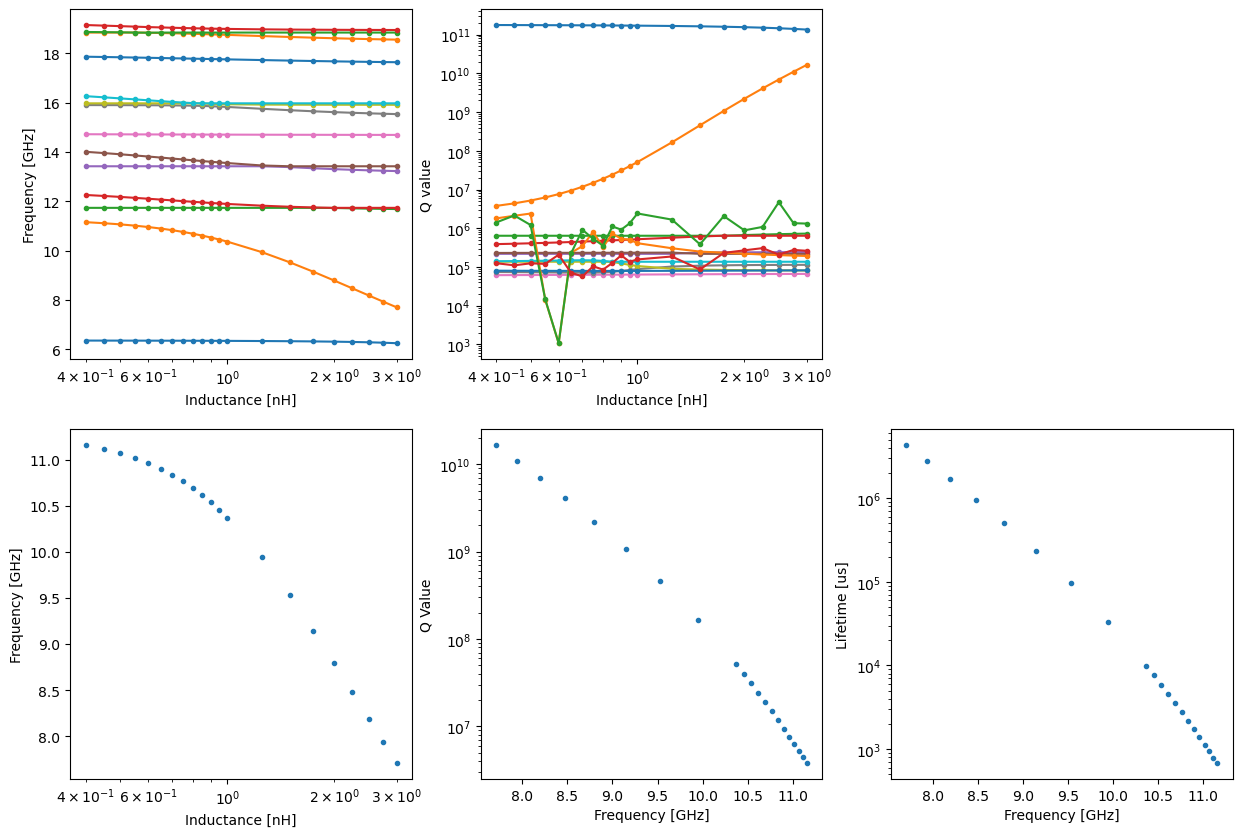

In [ ]:
if solution_type == "Eigenmode":
    # report = hfss.post.reports_by_category.eigenmode(expressions=expressions)
    solution_data = report.get_solution_data()
    solution_data.export_data_to_csv(output="output/CoaxCavity_Eigenmode.csv")

    max_freq_list = []
    max_Q_list = []
    next_freq_list = []
    next_Q_list = []
    mode_freq_array = np.zeros(shape=(len(report.expressions), len(solution_data.variations)))
    mode_Q_array = np.zeros(shape=(len(report.expressions), len(solution_data.variations)))

    # First retrieve all information
    for id in range(len(solution_data.variations)):
         solution_data.set_active_variation(id)
         for imode, mode in enumerate(report.expressions):
            freq = solution_data.data_real(mode)[0]
            Q = abs(0.5 * freq / solution_data.data_imag(mode)[0])
            # if solution_data.data_imag(mode)[0] > 0:
            #     Q = abs(0.5 * freq / solution_data.data_imag(mode)[0])
            # else:
            #     Q = 1e+11
            mode_freq_array[imode][id] = freq
            mode_Q_array[imode][id] = Q
    # Get unrelated mode info
    if copy_mesh:
        tol = 0.1e+9
    else:
        tol = 0.05e+9
    flat = mode_freq_array.flatten()
    groups = []
    averages = []
    used = set()

    min_count = int(0.8*len(solution_data.variations))
    for i, val in enumerate(flat):
        if i in used:
            continue
        close_idx = np.where(np.abs(flat - val) <= tol)[0]
        if len(close_idx) >= min_count:  # 指定回数以上出現した場合のみ
            group_vals = flat[close_idx]
            avg = np.mean(group_vals)
            groups.append(group_vals.tolist())
            averages.append(avg)
            used.update(close_idx)

    print("average:")
    pprint.pprint(averages)

    if not no_variation:
        pass
    else:
        for id in range(len(solution_data.variations)):
            #print(solution_data.variations[id])
            solution_data.set_active_variation(id)

            max_Q = 1
            max_freq = 1
            next_Q = 1
            next_freq = 1
            for imode, mode in enumerate(report.expressions):
                freq = solution_data.data_real(mode)[0]
                Q = abs(0.5 * freq / solution_data.data_imag(mode)[0])
                # if solution_data.data_imag(mode)[0] > 0:
                #     Q = abs(0.5 * freq / solution_data.data_imag(mode)[0])
                # else:
                #     Q = 1e+11
                if any(np.abs(np.array(averages) - freq) <= tol):
                    continue
                if Q > max_Q:
                    next_Q = copy.copy(max_Q)
                    next_freq = copy.copy(max_freq)
                    max_Q = copy.copy(Q)
                    max_freq = copy.copy(freq)
                elif Q > next_Q:
                    next_Q = copy.copy(Q)
                    next_freq = copy.copy(freq)

            max_freq_list.append(max_freq)
            max_Q_list.append(max_Q)
            next_freq_list.append(next_freq)
            next_Q_list.append(next_Q)
            # print("Max  Frequency : ",max_freq*1e-9, " [GHz]")
            # print("Max  Q-value   : ",max_Q*1e-6, "M")
            # print("Next Frequency : ",next_freq*1e-9, " [GHz]")
            # print("Next Q-value   : ",next_Q*1e-6, "M")


        variation_list = []
        for my_dict in solution_data.variations:
            new_list = [ i.value for i in list(my_dict.values()) ]
            variation_list.extend(new_list)

        # Make plots
        variation_list = np.array(variation_list)
        max_freq_list = np.array(max_freq_list)
        next_freq_list = np.array(next_freq_list)
        max_Q_list = np.array(max_Q_list)
        next_Q_list = np.array(next_Q_list)
        max_lifetime_list = 2*max_Q_list/max_freq_list
        next_lifetime_list = 2*next_Q_list/next_freq_list
        plt.figure(figsize=(15,10))
        plt.subplot(231, xlabel = "Inductance [nH]", ylabel = "Frequency [GHz]")
        for imode, mode in enumerate(report.expressions):
            plt.plot(variation_list*1e9, mode_freq_array[imode]*1e-9, marker = ".")
        plt.xscale('log')

        plt.subplot(232, xlabel = "Inductance [nH]", ylabel = "Q value")
        for imode, mode in enumerate(report.expressions):
            plt.plot(variation_list*1e9, mode_Q_array[imode], marker = ".")
        plt.yscale('log')
        plt.xscale('log')

        plt.subplot(234, xlabel = "Inductance [nH]", ylabel = "Frequency [GHz]")
        plt.plot(variation_list*1e9, max_freq_list*1e-9, marker=".", linestyle='None')
        #plt.plot(variation_list*1e9, next_freq_list*1e-9, marker=".")
        plt.xscale('log')

        plt.subplot(235, xlabel = "Frequency [GHz]", ylabel = "Q Value")
        plt.plot(max_freq_list*1e-9, max_Q_list, marker=".", linestyle='None')
        #plt.plot(next_freq_list*1e-9, next_Q_list, marker=".")
        plt.yscale('log')

        plt.subplot(236, xlabel = "Frequency [GHz]", ylabel = "Lifetime [us]")
        plt.plot(max_freq_list*1e-9, max_lifetime_list*1e6, marker=".", linestyle='None')
        #plt.plot(next_freq_list*1e-9, next_Q_list, marker=".")
        plt.yscale('log')

In [ ]:
## Get intrinsic information (First you need the solution frequency)
intrinsics = hfss.setups[0].default_intrinsics
print(intrinsics)
print(hfss.setups)
solution = hfss.setups[0].get_solution_data()
# intrinsics["Freq"] = hfss.setups[0].properties["Solution Freq"]

{'Phase': '0deg'}
[MySetup with 0 Sweeps]
PyAEDT WARNING: Solution Data failed to load. Check solution, context or expression.
PyAEDT WARNING: No Data Available. Check inputs


In [ ]:
## Plot field (Currently disabled)
# cutlist = ["Global:YZ"]
# setup_name = hfss.existing_analysis_sweeps[0]
# #setup_name = "Sweep1"
# quantity_name = "Mag_E"
# intrinsic = {"Freq": "5GHz", "Phase": "0deg"}
# hfss.logger.info("Generating the image")
# plot_obj = hfss.post.plot_field(
#         quantity="Mag_E",
#         assignment=cutlist,
#         plot_type="CutPlane",
#         setup=setup_name,
#         intrinsics=intrinsic
#     )

In [ ]:
#field_plot = hfss.post.create_fieldplot_volume( ["boundary"],"Mag_E", plot_name="boundary_Mag")
plane_plot = hfss.post.create_fieldplot_cutplane("Global:YZ", "Mag_E", plot_name = "plane_Mag")

In [ ]:
if solution_type=="Modal":
    # sweeps = hfss.get_sweeps("MySetup")
    # sweep = hfss.setups[0].sweeps[0]
    # print(sweep.frequencies)

    ooptimetric = hfss.get_oo_object(aedt_object=hfss.ooptimetrics, object_name="ChipGap")
    print(hfss.get_oo_properties(aedt_object=hfss.ooptimetrics, object_name="ChipGap"))
    print(hfss.get_oo_property_value(aedt_object=hfss.ooptimetrics, object_name="ChipGap", prop_name="IncludedVariables"))
    print(ooptimetric)

    # plane_plot.delete()
    # plane_plot = hfss.post.create_fieldplot_cutplane("Global:YZ", "Mag_E", plot_name = "plane_Mag", setup="MySetup: Sweep1")

In [ ]:
if solution_type=="Eigenmode":
    sources = {"1": "0", "2": "0", "3": "1"}
    hfss.edit_sources(sources, eigenmode_stored_energy=True)

    min_value = hfss.post.get_scalar_field_value("Mag_E","Minimum")
    max_value = hfss.post.get_scalar_field_value("Mag_E","Maximum")
    print(max_value, min_value)

    plane_plot.change_plot_scale(maximum_value=max_value, minimum_value=1, is_log=True)
    # hfss.post.change_field_plot_scale(plot_name="plane_Mag1", maximum_value=max_value, minimum_value=1, is_log=True )

PyAEDT ERROR: **************************************************************
PyAEDT ERROR:   File "<frozen runpy>", line 198, in _run_module_as_main
PyAEDT ERROR:   File "<frozen runpy>", line 88, in _run_code
PyAEDT ERROR:   File "c:\Users\ymino\.conda\envs\pyaedt\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
PyAEDT ERROR:     app.launch_new_instance()
PyAEDT ERROR:   File "c:\Users\ymino\.conda\envs\pyaedt\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
PyAEDT ERROR:     app.start()
PyAEDT ERROR:   File "c:\Users\ymino\.conda\envs\pyaedt\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
PyAEDT ERROR:     self.io_loop.start()
PyAEDT ERROR:   File "c:\Users\ymino\.conda\envs\pyaedt\Lib\site-packages\tornado\platform\asyncio.py", line 211, in start
PyAEDT ERROR:     self.asyncio_loop.run_forever()
PyAEDT ERROR:   File "c:\Users\ymino\.conda\envs\pyaedt\Lib\asyncio\base_events.py", line 608, in run_forever
PyAEDT ERROR:     s

In [ ]:
# for id in range(len(solution_data.variations)):
#         solution_data.set_active_variation(id)
#         plane_plot.update()
#         # hfss.post.create_fieldplot_cutplane("Global:YZ", "Mag_E", plot_name = "plane_Mag",)

In [ ]:
## The following function is correct, but doesn't work due to PyVista...
# hfss.post.plot_field(
#     quantity="Mag_E",
#     assignment="Global:YZ",
#     plot_type="CutPlane",
#     log_scale=True,
# )